# Situación problema: Porcentaje de población con acceso a electricidad

## Librerías

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [7]:
%ls

 00_00_binder.ipynb                     dataa.csv
 00_00_primer_pasos.ipynb               data.csv
 01_01_data_types.ipynb                 headbrain.csv
 01_02_read_iloc_unique_groupby.ipynb   Kag_happiness_indicators.csv
 02_00_data_wrangling.ipynb             mic2.xlsx
 02_01_null_display.ipynb               mic.xlsx
 02_02_basic_math.ipynb                 movies.csv
 A3.ipynb                               nhanes_2015_2016.csv
'A5 (1).ipynb'                          pokemon.csv
 A6.ipynb                               README.md
'A6 LucianaMontalvo.ipynb'              reg_data.csv
 act9.ipynb                             requirements.txt
'Actividad 6.ipynb'                     s10.ipynb
 adult.csv                              S3.ipynb
 airline_data.csv                       s4
 antropometria00.csv                    s4.ipynb
 antropometria-dataset-1.csv            S5.ipynb
 antropometria-dataset-2.csv            s7.ipynb
 antropometria-dataset.csv              s8.1.ipynb
 Book3.csv     

In [8]:
df=pd.read_csv('dataa.csv')

In [9]:
df.columns

Index(['Country Name', 'Income group', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [10]:
df.columns=list(map(str,df.columns))
all(isinstance(column,str)for column in df.columns)

True

In [11]:
df['Total Average']=df.iloc[:,1:].mean(axis=1)
df.set_index('Country Name', inplace = True)
df.drop(['2019','2020'], axis=1, inplace=True)
df.head()

,Income group,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Average
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,High income,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.00000,100.00000,...,93.356292,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.420246
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.233373,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,30.201640
Afghanistan,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.700000,43.222019,69.100000,68.982941,89.500000,71.500000,97.700000,97.700000,98.715622,63.269207
Africa Western and Central,NaN,NaN,NaN,NaN,31.693097,32.714738,33.703684,32.748158,32.55254,33.54269,...,41.730881,45.901299,44.130354,47.018163,47.745499,46.752279,50.948939,48.848205,51.253253,40.549915
Angola,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.879726,34.600000,37.101025,38.248993,32.000000,42.000000,41.797379,43.001610,45.290000,35.105909


In [12]:
df.columns

Index(['Income group', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', 'Total Average'],
      dtype='object')

In [13]:
years=list(map(str,range(1990,2018)))
years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

# Luciana Montalvo Barragán
A01720572

## Introducción

Esta base de datos se obtuvo de The World Bank por la agencia de International Energy Agency ( IEA ), the International Renewable Energy Agency ( IRENA ), the United Nations Statistics Division ( UNSD ).

liga para la base de Datos:
https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS?view=chart

## Base de Datos

In [14]:
df

,Income group,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Average
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,High income,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,...,93.356292,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.420246
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.233373,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,30.201640
Afghanistan,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.700000,43.222019,69.100000,68.982941,89.500000,71.500000,97.700000,97.700000,98.715622,63.269207
Africa Western and Central,NaN,NaN,NaN,NaN,31.693097,32.714738,33.703684,32.748158,32.552540,33.542690,...,41.730881,45.901299,44.130354,47.018163,47.745499,46.752279,50.948939,48.848205,51.253253,40.549915
Angola,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.879726,34.600000,37.101025,38.248993,32.000000,42.000000,41.797379,43.001610,45.290000,35.105909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,Upper middle income,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.000000,100.000000,99.750000,99.750000,99.680000,99.860000,99.800000,99.800000,100.000000,99.921333
"Yemen, Rep.",Low income,NaN,NaN,44.100000,40.774715,41.985134,43.193512,44.399170,42.600000,46.799610,...,60.674675,61.885273,52.410000,75.600000,66.100000,67.396667,68.918709,79.200000,62.000000,55.645397
South Africa,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,57.600000,69.483353,64.900000,...,82.900000,83.600000,85.300000,85.200000,86.000000,85.300000,84.200000,84.400000,84.700000,79.031783


Variables:
- 1990 - 2018: variables cuantitativas tipo Float, registro del porcentaje de población con acceso a la electricidad.
- Total Average: Promedio total del porcentaje a lo largo de los años
- Country Name: Países en donde se evaluó el porcentaje de población
- Income Group: variable cualitativa que describe el tipo de ingresos que tiene dicho país, peude ser:  High income, Low income, Upper middle income, lower middle income, etc.

## Pregunta de Investigación #1: ¿Como ha cambiado el porcentaje de población con acceso a electricidad en Colombia?

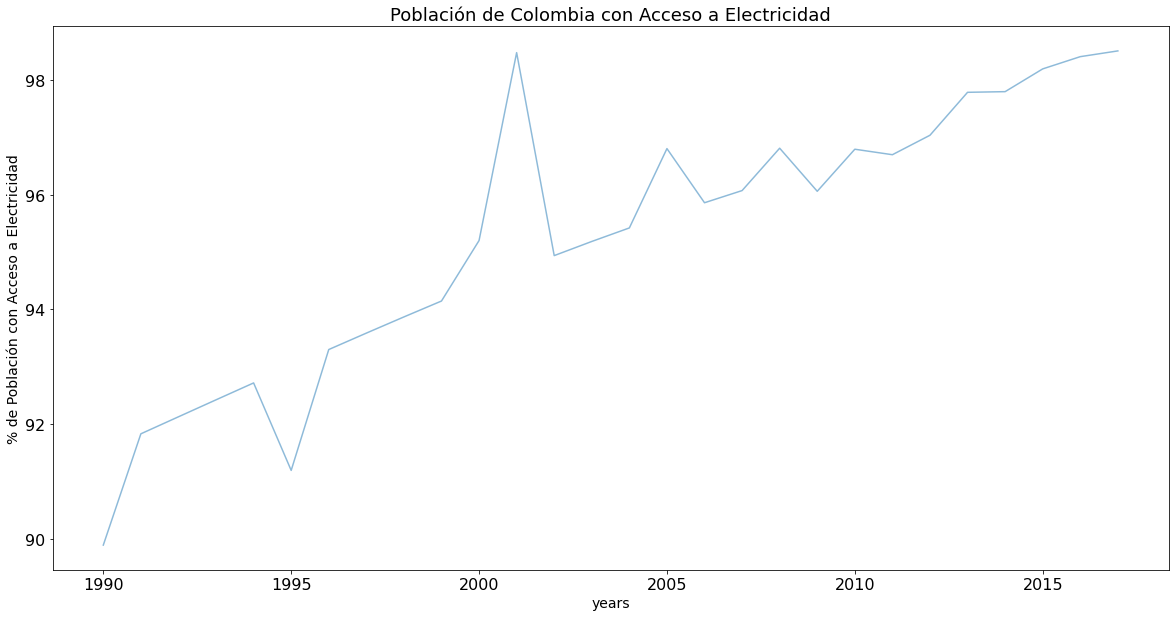

In [15]:
df.loc['Colombia', years].plot(figsize = (20,10), alpha = 0.5)
plt.xlabel('years',fontsize =14)
plt.xticks(fontsize = 16, rotation = 0)

plt.ylabel('% de Población con Acceso a Electricidad', fontsize = 14)
plt.yticks(fontsize = 16, rotation= 0)

plt.title('Población de Colombia con Acceso a Electricidad', fontsize = 18)
plt.show()

### Conclusión

La población de Colombia ha tenido, en general, una tendencia positiva a lo largo de los años. Ha habido algunos años donde hubo un crecimiento más pronunciado que otros y otros en donde ha habido una disminución en el % de población. Sin embargo en los últimos años, su porcentaje esta muy cercano, si no es que logró llegar al 100%.

## Pregunta de Investigación #2: ¿Cuáles son los 10 países con el menor porcentaje de acceso a la electricidad?

Text(0, 0.5, '% de población con acceso')

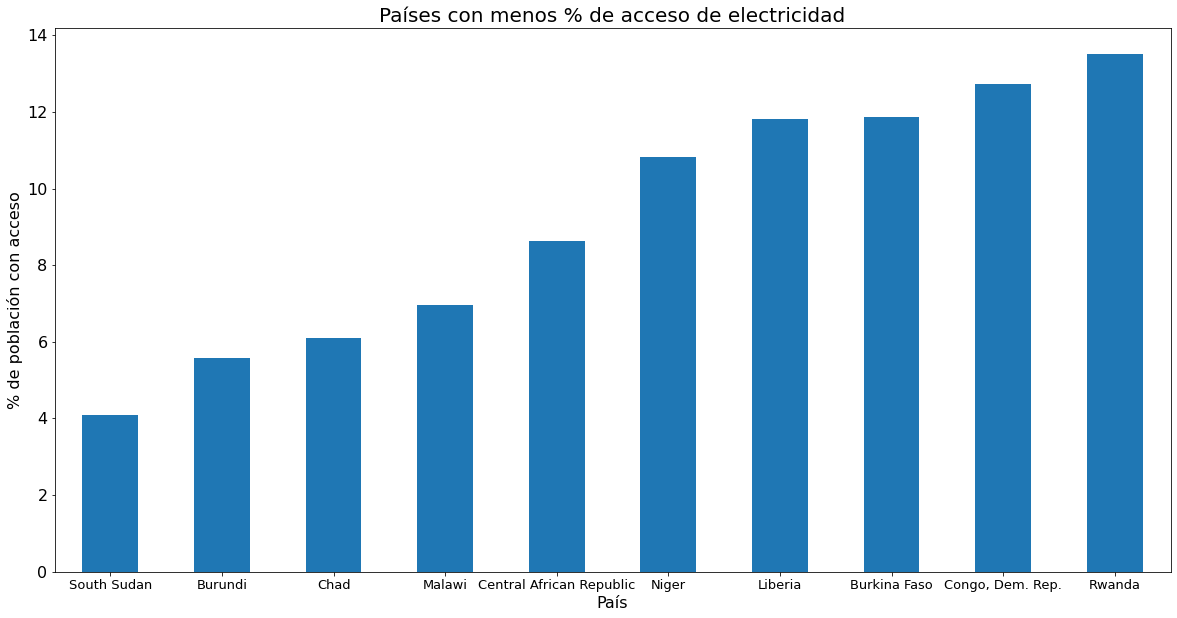

In [16]:
df_bottten=df.sort_values(by='Total Average', 
                          ascending=True,
                          axis=0,
                         )
df_bottten=df_bottten.head(10)
df_bottten=df_bottten.loc[:,'Total Average']

fig=plt.figure()

df_bottten.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=13,rotation=0)
plt.yticks(fontsize=16,rotation=0)

plt.title('Países con menos % de acceso de electricidad', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('% de población con acceso', fontsize=16)

### Conclusión 
El país con el menor porcentaje de población con acceso a la electricidad es South Sudan con solo un 4% de promedio en el total de registros. Además, se encuentran otros países como Malawi, Burundi, Chad, entre otros. Todos estos países se encuentran en África. 

## Pregunta de Investigación #3: ¿Cómo se compara el porcentaje de población con acceso a electricidad de Honduras y Ghana?

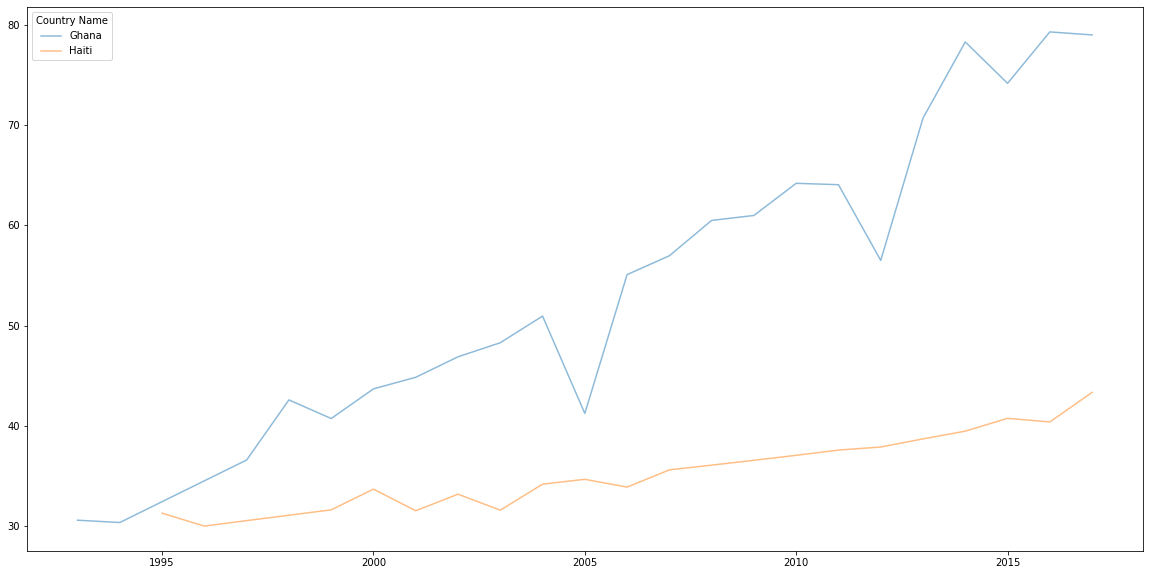

In [17]:
dfN = df.loc[['Ghana', 'Haiti'],years]
dfN = dfN.transpose()
dfN.plot(kind = 'line', figsize = (20,10), alpha = 0.5)

### Conclusión
Ambos países han tenido un crecimiento en su porcentaje a lo largo de los años y se puede ver una tendencia positiva de ambos. Si se comparan, se puede ver que Honduras tiene un porcentaje de población con acceso más alto que Ghana. 

## Pregunta de Investigación #4: ¿Cómo se comparan el porcentaje de población con acceso a internet de los diferentes grupos de cantidades de ingreso?

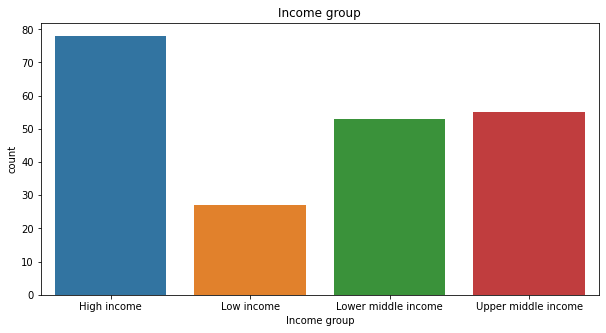

In [18]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
p = sns.countplot(x = 'Income group', ax = ax, data = df).set_title('Income group')


### Conclusión

Como se esperaba, el grupo de High income tiene el mayor porcentaje de población con acceso a internet con un valor de 77% aporximadamente. En segundo lugar está el upper middle income con un valor de 55% y con una diferencia muy pequeña, en seguida se encuentra el lower middle income con un porcentaje de 53%. Finalmente, se encuentra el low income con un porcentaje de 27%.


## Pregunta de Investigación #5: Existe una correlación entre el ingreso y el porcentaje total de población con acceso a internet?

In [24]:
modelA = sm.OLS.from_formula('Income~Total Average', data =df)
resultA = modelA.fit()
resultA.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

## Limitaciones

En la base de datos se encuentran algunos defectos:
- El registro no empieza en el mismo año para todos los países
- Hay registros de países y de grupos de países, esto quiere decir que los datos no es heterogenea, hay diferencias entre cómo se recuperaron los datos.
- El último registro fue para el año 2019, por lo tanto hace falta actualizar la base de datos. 

## Siguientes pasos

- Profundizar en la información encontrada
- Continuar con el análisis
- Preparar la información para la A10: Presentaciones finales